In [55]:
import numpy
import scipy.io
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]

In [27]:
def task2_genNeuron(W, X, applied_fun):
    
    # adding a column of ones 
    X_o = numpy.c_[numpy.ones(len(X)), X]
    
    Y = X_o @ W
    
    # finally return Y with whatever function g is applied
    return numpy.apply_along_axis(applied_fun, 0, Y)

In [28]:
def task2_hNeuron(W, X):    
    def step(x):
        print(x)
        return 1 * (x > 0)
    return task2_genNeuron(W, X, step)

def task2_sNeuron(W, X):
    def g(x):
        return 1/(1+numpy.exp(numpy.longdouble(-x)))
    return task2_genNeuron(W, X, g)

orig:   y < -4.700511036979204 * x + 24.533853223436726
tran:   0 < -4.700511036979204*x + -1*y + 24.533853223436726
stan:   0 < -0.19159285719085067*x + -0.04076000581289526*y + 1.0
orig:   y > -1.2177989674601823 * x + 4.932418326649072
tran:   0 < 1.2177989674601823*x + 1*y + -4.932418326649072
stan:   0 < 0.24689693509583485*x + 0.2027403058246619*y + -1.0
orig:   y > -0.415106777241107 * x + 3.340816171116984
tran:   0 < 0.415106777241107*x + 1*y + -3.340816171116984
stan:   0 < 0.1242531034272138*x + 0.2993280530205454*y + -1.0
orig:   y < 0.4081176380894294 * x + 4.418474556493729
tran:   0 < 0.4081176380894294*x + -1*y + 4.418474556493729
stan:   0 < 0.09236618495168845*x + -0.22632245296746664*y + 1.0
[[1.0, -0.19159285719085067, -0.04076000581289526], [-1.0, 0.24689693509583485, 0.2027403058246619], [-1.0, 0.1242531034272138, 0.2993280530205454], [1.0, 0.09236618495168845, -0.22632245296746664]]
[-0.8, 0.25, 0.25, 0.25, 0.25]


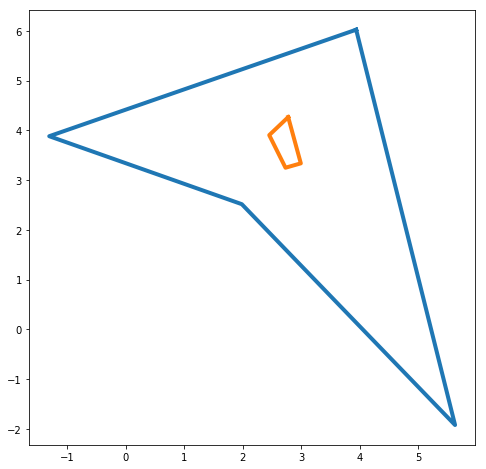

In [24]:
coords2 = [(2.77561,4.26753),(2.45166, 3.90597), (2.72966, 3.25103), (2.99143, 3.33845)]
coords = [(3.93753,6.02545), (5.62821, -1.92161), (1.98283, 2.51773), (-1.30907, 3.88422)]
coords = coords + [coords[0]]
coords2 = coords2 + [coords2[0]]

xs = [c[0] for c in coords]
ys = [c[1] for c in coords]

xs2 = [c[0] for c in coords2]
ys2 = [c[1] for c in coords2]

first_layer = []
for i in range(4):
    dx = xs[i+1]-xs[i]
    dy = ys[i+1]-ys[i]
    a = dy/dx
    b = ys[i] - a*xs[i]
    print(f"orig:   y {'<' if i in [0,3] else '>'} {a} * x + {b}")
    if i in [0,3]:
        w0, wx, wy = b, a, (-1)
    else:
        w0, wx, wy = -b, -a, 1
    
    print(f'tran:   0 < {wx}*x + {wy}*y + {w0}')
    norm_const = max(abs(wx),abs(wy),abs(w0))
    wx, wy, w0 = wx/norm_const, wy/norm_const, w0/norm_const
    print(f'stan:   0 < {wx}*x + {wy}*y + {w0}')
    first_layer.append([w0,wx,wy])

plt.plot(xs,ys, linewidth=4)
plt.plot(xs2,ys2, linewidth=4)
plt.savefig('task2_polygons.png')

print(first_layer)
upper_neuron = [-4/5, 1/4, 1/4, 1/4, 1/4]
print(upper_neuron)

In [15]:
# TODO !!! redo this so that A is here, not B

with open('task2_hNN_A_weights.txt', 'w') as f:
    # first layer
    num=1
    for w0, wx, wy in first_layer:
        print(f'W({1},{num},{0}) : {w0}', file=f)
        print(f'W({1},{num},{1}) : {wx}', file=f)
        print(f'W({1},{num},{2}) : {wy}', file=f)
        num += 1

    # second layer
    num=0
    for w in upper_neuron:
        print(f'W({2},{1},{num}) : {w}', file=f)
        num += 1

In [29]:
def listToColV(li):
    return numpy.asarray(li).reshape(-1,1)

# task 2.4
def task2_hNN_A(X):
    first_layer = [[1.0, 0.9541936586843557, -0.85493703875096],
                   [-1.0, 0.2433319217436556, 0.1032862159048711],
                   [-1.0, -0.14275094489266318, 0.4274526978329043], 
                   [1.0, -0.265467958624089, -0.061666696980078]]
    upper_neuron = [-0.8, 0.25, 0.25, 0.25, 0.25]
    
   
    first_layer_results = [task2_hNeuron(listToColV(W), X) for W in first_layer]
    first_layer_X = numpy.column_stack(first_layer_results)
    final_result = task2_hNeuron(listToColV(upper_neuron), first_layer_X)
    return final_result

X_test = numpy.vstack((numpy.array((0.0, 0.0)), 
                       numpy.array((2.5, 3.3)), 
                       numpy.array((2.8, 3.6)), 
                       numpy.array((2.7, 3.5)),
                       numpy.array((3.0, 3.4)),
                       numpy.array((2.5, 4.0)),
                       numpy.array((2.5, 3.9)),
                       numpy.array((2.77561,4.26753))
                      ))
Z = task2_hNN_A(X_test)
print(Z)
Zs = [z[0] for z in Z]

[ 1.          0.56419192  0.5939689   0.58404324  0.95579504 -0.03426401
  0.0512297   0.        ]
[-1.         -0.05082568  0.05315976  0.01849794  0.0811689   0.02147467
  0.01114605  0.11617154]
[-1.          0.05371654  0.13912707  0.11065689  0.02508634  0.35293343
  0.31018816  0.42794626]
[  1.00000000e+00   1.32830003e-01   3.46896067e-02   6.74030723e-02
  -6.07064560e-03   8.96633155e-02   9.58299852e-02   1.11022302e-16]
[-0.3  -0.05  0.2   0.2  -0.05 -0.05  0.2  -0.05]
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]


[ 0.72525366  0.72592227  0.72659087 ...,  0.10944646  0.11011506
  0.11078367]
[-0.10614474 -0.10597424 -0.10580373 ...,  0.21877592  0.21894643
  0.21911693]
[-0.06024417 -0.0603442  -0.06044423 ...,  0.48120926  0.48110924
  0.48100921]
[ 0.17787681  0.17769079  0.17750478 ..., -0.10007878 -0.10026479
 -0.10045081]
[-0.3  -0.3  -0.3  ..., -0.05 -0.05 -0.05]


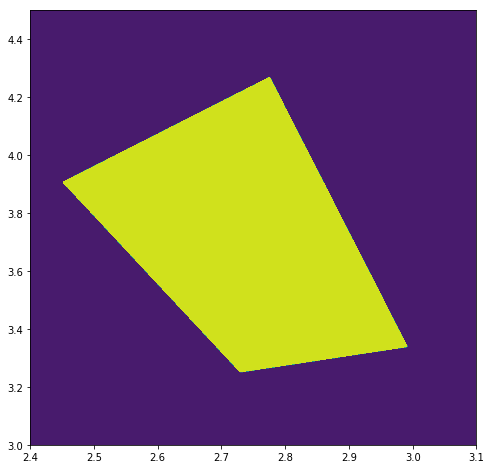

In [30]:
# task 2.5
X_N, Y_N = 1000, 1000
x = numpy.linspace(2.4, 3.1, X_N)
y = numpy.linspace(3.0, 4.5, Y_N)

X, Y = numpy.meshgrid(x, y)

X_grid = []
for i in range(Y_N):
    for j in range(X_N):
        X_grid.append([X.item(i,j), Y.item(i,j)])

X_grid = numpy.asarray(X_grid)
Y_grid = task2_hNN_A(X_grid)

Z = Y_grid.reshape((Y_N, X_N))
        
plt.contourf(X, Y, Z)
plt.savefig('t2_regions_hNN_A.pdf')

In [31]:
# task 2.6
def task2_hNN_AB(X):
    first_layer = [
                    [1.0, 0.9541936586843557, -0.85493703875096], 
                    [-1.0, 0.2433319217436556, 0.1032862159048711], 
                    [-1.0, -0.14275094489266318, 0.4274526978329043], 
                    [1.0, -0.265467958624089, -0.061666696980078],
                    [1.0, -0.19159285719085067, -0.04076000581289526], 
                    [-1.0, 0.24689693509583485, 0.2027403058246619], 
                    [-1.0, 0.1242531034272138, 0.2993280530205454], 
                    [1.0, 0.09236618495168845, -0.22632245296746664]
    ]
    
    second_layer = [
                    [-0.8, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0], 
                    [-(1/2+1/16), 0, 0, 0, 0, 1/4, 1/8, 1/8, 1/4]
    ]
    
    final_neuron = [-0.5, -1.0, 1.0]
    
    first_layer_results = [task2_hNeuron(listToColV(W), X) for W in first_layer]
    first_layer_X = numpy.column_stack(first_layer_results)
    
    second_layer_results = [task2_hNeuron(listToColV(W), first_layer_X) for W in second_layer]
    second_layer_X = numpy.column_stack(second_layer_results)
    
    final_result = task2_hNeuron(listToColV(final_neuron), second_layer_X)
    
    return final_result

[-3.54577598 -3.54572822 -3.54568046 ..., -3.54090866 -3.5408609
 -3.54081315]
[-0.92059646 -0.92058428 -0.9205721  ..., -0.90328991 -0.90327773
 -0.90326555]
[ 0.83483389  0.83482674  0.8348196  ...,  0.84908326  0.84907612
  0.84906898]
[ 1.11003791  1.11002462  1.11001134 ...,  1.09370775  1.09369446
  1.09368118]
[ 1.09385682  1.09384723  1.09383764 ...,  1.08225836  1.08224877
  1.08223918]
[-0.54187111 -0.54185875 -0.54184639 ..., -0.51941396 -0.5194016
 -0.51938924]
[-0.00886192 -0.0088557  -0.00884948 ...,  0.0123047   0.01231092
  0.01231714]
[ 0.00652724  0.00653186  0.00653649 ..., -0.00017982 -0.00017519
 -0.00017057]
[-0.3 -0.3 -0.3 ..., -0.3 -0.3 -0.3]
[-0.0625 -0.0625 -0.0625 ..., -0.1875 -0.1875 -0.1875]
[-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]


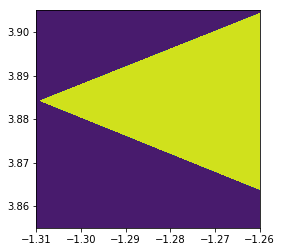

In [58]:
# task 2.7
X_N, Y_N = 1000, 1000
x = numpy.linspace(-2, 7, X_N)
y = numpy.linspace(-2, 7, Y_N)

X, Y = numpy.meshgrid(x, y)

X_grid = []
for i in range(Y_N):
    for j in range(X_N):
        X_grid.append([X.item(i,j), Y.item(i,j)])

X_grid = numpy.asarray(X_grid)
Y_grid = task2_hNN_AB(X_grid)

Z = Y_grid.reshape((Y_N, X_N))
        
plt.contourf(X, Y, Z)
plt.savefig('t2_regions_hNN_AB.pdf')

In [ ]:
x = numpy.linspace(-1.31, -1.31+0.1/2, X_N)
y = numpy.linspace(3.88-0.05/2, 3.88+0.05/2, Y_N)

In [33]:
# task 2.8
def task2_sNN_AB(X):
    first_layer = [
                    [1.0, 0.9541936586843557, -0.85493703875096], 
                    [-1.0, 0.2433319217436556, 0.1032862159048711], 
                    [-1.0, -0.14275094489266318, 0.4274526978329043], 
                    [1.0, -0.265467958624089, -0.061666696980078],
                    [1.0, -0.19159285719085067, -0.04076000581289526], 
                    [-1.0, 0.24689693509583485, 0.2027403058246619], 
                    [-1.0, 0.1242531034272138, 0.2993280530205454], 
                    [1.0, 0.09236618495168845, -0.22632245296746664]
    ]
    
    def make_big(vec):
        return (numpy.asarray(vec)*1000.0).tolist()
    
    first_layer = [make_big(neuron) for neuron in first_layer]
    
    
    second_layer = [
                    make_big([-0.8, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0]), 
                    make_big([-(1/2+1/16), 0, 0, 0, 0, 1/4, 1/8, 1/8, 1/4]),
    ]
    
    final_neuron = make_big([-0.5, -1.0, 1.0])
    
    first_layer_results = [task2_sNeuron(listToColV(W), X) for W in first_layer]
    first_layer_X = numpy.column_stack(first_layer_results)
    
    second_layer_results = [task2_sNeuron(listToColV(W), first_layer_X) for W in second_layer]
    second_layer_X = numpy.column_stack(second_layer_results)
    
    final_result = task2_sNeuron(listToColV(final_neuron), second_layer_X)
    
    return final_result

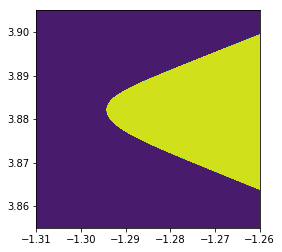

In [59]:
# task 2.9
X_N, Y_N = 1000, 1000
x = numpy.linspace(-2, 7, X_N)
y = numpy.linspace(-2, 7, Y_N)

X, Y = numpy.meshgrid(x, y)

X_grid = []
for i in range(Y_N):
    for j in range(X_N):
        X_grid.append([X.item(i,j), Y.item(i,j)])

X_grid = numpy.asarray(X_grid)
Y_grid = task2_sNN_AB(X_grid)

Z = Y_grid.reshape((Y_N, X_N))
        
plt.contourf(X, Y, Z)
plt.savefig('t2_regions_sNN_AB.pdf')

/usr/lib/python3/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


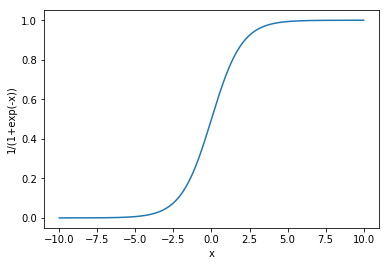

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


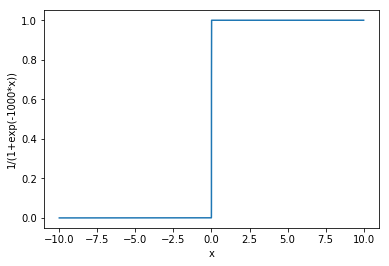

In [22]:
# task 2.10
X = numpy.asarray(numpy.linspace(-10,10,1000*1000))
Y = 1/(1+numpy.exp(-X))
plt.plot(X,Y)
fig = plt.axes()
fig.set_xlabel('x')
fig.set_ylabel('1/(1+exp(-x))')
plt.savefig('sigmo_first.png')
plt.show()

X = numpy.asarray(numpy.linspace(-10,10,1000*1000))
fig = plt.axes()
fig.set_xlabel('x')
fig.set_ylabel('1/(1+exp(-1000*x))')
Y = 1/(1+numpy.exp(-1000*X))
plt.plot(X,Y)
plt.savefig('sigmo_second.png')